# Charger les données dans le DataFrame

In [7]:
import pandas as pd

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')
print(df.head())



   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [51]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# les données et les valeurs attendues

In [9]:
df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Détection des valeurs aberrantes 
Boxplot permet de visualiser les valeurs aberrantes avec sns

In [10]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Sélectionner uniquement les colonnes numériques
df_num = df.select_dtypes(include='number')

# Créer un boxplot pour toutes les colonnes numériques
fig = px.box(df_num, title='Détection des valeurs aberrantes (colonnes numériques)')
fig.show()

# le nombre de valeurs manquantes par colonne

In [11]:
import pandas as pd

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Afficher le nombre de valeurs manquantes par colonne
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Fillna ou Drop pour le remplacement des colonne vide

In [12]:
import pandas as pd

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Remplacer les âges manquants par la médiane selon le sexe
df['Age'] = df.groupby('Sex')['Age'].transform(lambda x: x.fillna(x.mean()))

# Remplacer Embarked manquant par la valeur la plus fréquente
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Supprimer la collone 'Cabin' 
df.drop(columns=['Cabin'], inplace=True)

/tmp/ipykernel_859/389596997.py:9: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





# Identification et suppression des doublons

In [13]:
def identifier_et_supprimer_les_doublons(df):
    # Identifier les doublons 
    doublons = df[df.duplicated()]
    # Supprimer les doublons et garder la première occurrence
    df_sans_doublons = df.drop_duplicates()
    return doublons, df_sans_doublons


# Identifier les types de données

In [14]:
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Embarked        object
dtype: object


# Répartition des sex dans le jeu de données Titanic

In [15]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Par exemple, compter combien de survivants par sexe
survivants_par_sexe = df.groupby('Sex')['Survived'].sum().reset_index()

fig = px.bar(survivants_par_sexe, x='Sex', y='Survived', title='Nombre de survivants par sexe')
fig.show()

# Répartition des survivants et des morts 

In [16]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Compter le nombre de survivants et de morts
Survi = df['Survived'].value_counts().reset_index()
Survi.columns = ['Survived', 'Count']

Survi['Survived'] = Survi['Survived'].map({0: 'Morts', 1: 'Survivants'})

# Créer le graphique en barres
fig = px.bar(Survi, x='Survived', y='Count', title='Répartition des survivants et des morts')
fig.show()

# La répartition des survivants par sexe

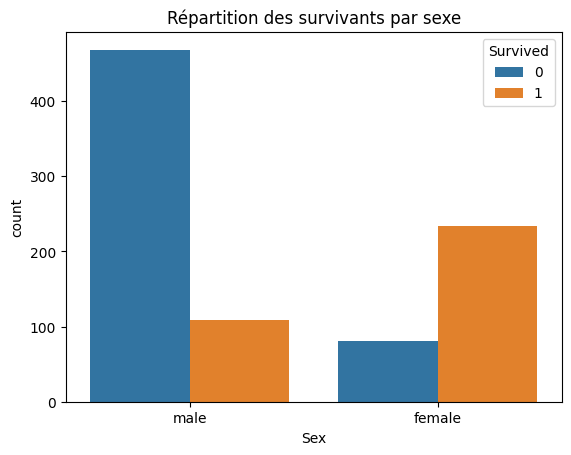

In [17]:
# Répartition des survivants par rapport au mort 
# 0 = décédé, 1 = survivant

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Sex', hue='Survived', data=df)
plt.title("Répartition des survivants par sexe")
plt.show()


# Distribution des âges des passagers

In [18]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Afficher un histogramme de la distribution des âges
fig = px.histogram(df, x='Age', nbins= 20, title='Distribution des âges des passagers')
fig.update_layout(xaxis_title='Âge', yaxis_title='Nombre de passagers')
fig.show()

# Répartition des passagers par port d\'embarquement

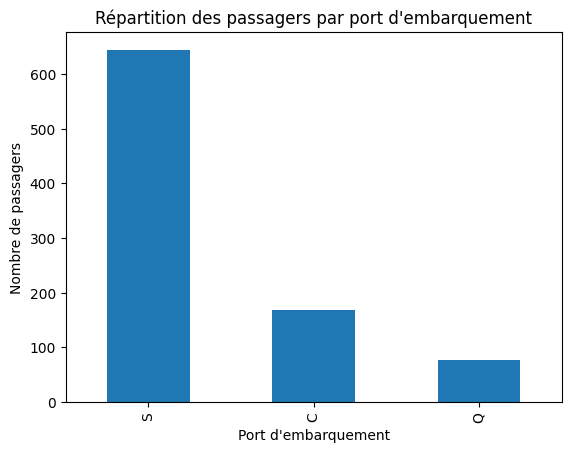

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/home/fadilatou/Projet-titanic/train.csv')  

data['Embarked'].value_counts().plot.bar(title='Répartition des passagers par port d\'embarquement')
plt.xlabel('Port d\'embarquement')
plt.ylabel('Nombre de passagers')
plt.show()

# Le nombre de passagers par port d'embarquement

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('/home/fadilatou/Projet-titanic/train.csv')

passagers_par_port = df['Embarked'].value_counts()
print(passagers_par_port)

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


#  Nombre de survivant et de décés par port d'embarquement

In [21]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Calculer le nombre de survivants et de décès par port d'embarquement
embarked_surv = df.groupby(['Embarked', 'Survived']).size().reset_index(name='Count')

# Renommer les catégories pour plus de clarté
embarked_surv['Survived'] = embarked_surv['Survived'].map({0: 'Décès', 1: 'Survivant'})

# Créer le graphique en barres groupées
fig = px.bar(embarked_surv, x='Embarked', y='Count', color='Survived', barmode='group',
              labels={'Embarked': "Port d'embarquement", 'Count': 'Nombre de passagers', 'Survived': 'Statut'},
              title="Nombre de survivants et de décès par port d'embarquement")
fig.show()

# Le nombre de passagers par classe

In [22]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Calculer le nombre de personnes par classe
pclass_counts = df['Pclass'].value_counts().reset_index()
pclass_counts.columns = ['Pclass', 'Count']

# Créer le graphique en barres
fig = px.bar(pclass_counts, x='Pclass', y='Count', title='Nombre de personnes par classe')
fig.update_layout(xaxis_title='Classe', yaxis_title='Nombre de passagers')
fig.show()

# Nombre de survivants et de déces par classe 

In [23]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Calculer le nombre de survivants et de décès par classe
embarked_surv = df.groupby(['Pclass', 'Survived']).size().reset_index(name='Count')

# Renommer les catégories pour plus de clarté
embarked_surv['Survived'] = embarked_surv['Survived'].map({0: 'Décès', 1: 'Survivant'})

# Créer le graphique en barres groupées
fig = px.bar(embarked_surv, x='Pclass', y='Count', color='Survived', barmode='group',
              labels={'Pclass': "Classe", 'Count': 'Nombre de passagers', 'Survived': 'Statut'},
              title="Nombre de survivants et de décès par classe")
fig.show()

# Le taux de survie par classe

In [24]:

survival_rate_by_class = df.groupby("Pclass")["Survived"].mean()
print("Taux de survie par classe :")
print(round(survival_rate_by_class * 100, 2)) 


Taux de survie par classe :
Pclass
1    62.96
2    47.28
3    24.24
Name: Survived, dtype: float64


# La répartition des survivants par tranche d'age

In [25]:
# Les tranches d'âge (bins)
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df["AgeGroup"] = pd.cut(df["Age"], bins=age_bins, labels=age_labels)

# Calculer le taux de survie par tranche d'âge
survival_by_age_group = df.groupby("AgeGroup")["Survived"].mean() * 100
print("Pourcentage de survie par tranche d'âge :")
print(round(survival_by_age_group, 2))



Pourcentage de survie par tranche d'âge :
AgeGroup
0-10     59.38
11-20    38.26
21-30    36.52
31-40    44.52
41-50    38.37
51-60    40.48
61-70    23.53
71-80    20.00
Name: Survived, dtype: float64


/tmp/ipykernel_859/2625225860.py:7: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



In [26]:
import pandas as pd
import plotly.express as px

df = pd.read_csv(r'/home/fadilatou/Projet-titanic/train.csv')

# Créer les tranches d'âge
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
age_labels = ['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-80']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Filtrer uniquement les survivants
survivants = df[df['Survived'] == 1]

# Compter le nombre de survivants par tranche d'âge
survivants_par_age = survivants['AgeGroup'].value_counts().sort_index().reset_index()
survivants_par_age.columns = ['AgeGroup', 'Count']

# Créer le graphique en camembert
fig = px.pie(survivants_par_age, names='AgeGroup', values='Count', title='Répartition des survivants par tranche d\'âge')
fig.show()

# Extraction de feature Nom pour avoir les titres

In [27]:

# Extraction du titre depuis la colonne Name
df['Title'] = df['Name'].apply(lambda name: name.split(',')[1].split('.')[0].strip())

print(df[['Name', 'Title']].head())

                                                Name Title
0                            Braund, Mr. Owen Harris    Mr
1  Cumings, Mrs. John Bradley (Florence Briggs Th...   Mrs
2                             Heikkinen, Miss. Laina  Miss
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)   Mrs
4                           Allen, Mr. William Henry    Mr


# Encodage des colonnes Sex et Embarked

In [43]:
df_encoded = pd.get_dummies(df, columns=["Sex", "Embarked"])